In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
 x_data = np.linspace(0,11,1000000)

In [3]:
x_data

array([0.0000000e+00, 1.1000011e-05, 2.2000022e-05, ..., 1.0999978e+01,
       1.0999989e+01, 1.1000000e+01])

In [4]:
# x_data = x_data.reshape(1000000,1)
x_data

array([0.0000000e+00, 1.1000011e-05, 2.2000022e-05, ..., 1.0999978e+01,
       1.0999989e+01, 1.1000000e+01])

In [5]:
noise = np.random.randn(len(x_data))
# noise = np.reshape(1000000,1)

In [6]:
y_label = (0.5)*x_data + 5 + noise

In [7]:
y_label

array([ 6.16112476,  5.40019322,  5.11355749, ...,  8.7848649 ,
       12.8938717 , 10.64017058])

In [8]:
x_df = pd.DataFrame(data = x_data, columns=['X'])
y_df = pd.DataFrame(data = y_label, columns= ['Y'])

In [9]:
my_data = pd.concat([x_df, y_df], axis =1)
my_data.head()

,X,Y
0,0.000000,6.161125
1,0.000011,5.400193
2,0.000022,5.113557
3,0.000033,5.496416
4,0.000044,4.801471


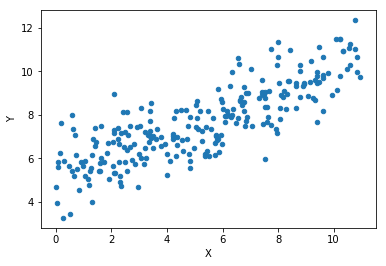

In [10]:
my_data.sample(n=250).plot(kind = "scatter", x = 'X', y= 'Y')

we cannot have 1 million neurons at input layer, so we provide batches of data

In [11]:
batch_size = 10

In [12]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [13]:
inputs = tf.placeholder(tf.float32,[batch_size])
outputs = tf.placeholder(tf.float32,[batch_size])

In [14]:
y_pred = m*inputs+b

In [15]:
error = tf.reduce_sum(tf.square(outputs-y_pred))

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [17]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    for i in range(batches):
        rand_index = np.random.randint(len(x_data), size = batch_size)
        feed = {inputs:x_data[rand_index], outputs:y_label[rand_index]}
        sess.run(train, feed_dict = feed)
    final_m , final_b = sess.run([m,b])

In [18]:
y_final_pred = final_m*x_data+final_b

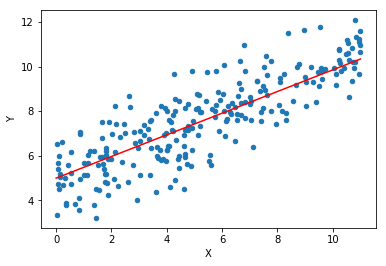

In [19]:
my_data.sample(250).plot(kind = "scatter", x= "X", y = "Y")
plt.plot(x_data, y_final_pred, "red")

# Using tf.estimator API

In [20]:
feat_colums = [ tf.feature_column.numeric_column('x', shape = [1])]

In [21]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_colums)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_is_chief': True, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9c6fad12b0>, '_save_checkpoints_secs': 600, '_device_fn': None, '_tf_random_seed': None, '_train_distribute': None, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_model_dir': '/tmp/tmpyj00w8go', '_master': '', '_task_id': 0, '_evaluation_master': '', '_num_ps_replicas': 0, '_session_config': None, '_service': None, '_keep_checkpoint_every_n_hours': 10000}


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_label, test_size = 0.3, random_state =101) 
#random state is for seed

In [24]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size= 10,num_epochs =None,shuffle=True)


In [25]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size= 10,num_epochs=1000,shuffle=False)

In [26]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test},y_test,batch_size= 10,num_epochs=1000,shuffle=True)

In [27]:
estimator.train(input_fn=input_func,steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpyj00w8go/model.ckpt.
INFO:tensorflow:loss = 739.30237, step = 1
INFO:tensorflow:global_step/sec: 449.793
INFO:tensorflow:loss = 32.626366, step = 101 (0.226 sec)
INFO:tensorflow:global_step/sec: 545.444
INFO:tensorflow:loss = 27.104656, step = 201 (0.181 sec)
INFO:tensorflow:global_step/sec: 608.01
INFO:tensorflow:loss = 25.412178, step = 301 (0.165 sec)
INFO:tensorflow:global_step/sec: 576.602
INFO:tensorflow:loss = 25.575125, step = 401 (0.173 sec)
INFO:tensorflow:global_step/sec: 578.817
INFO:tensorflow:loss = 15.734893, step = 501 (0.176 sec)
INFO:tensorflow:global_step/sec: 582.118
INFO:tensorflow:loss = 11.138893, step = 601 (0.171 sec)
INFO:tensorflow:global_step/sec: 570.384
INFO:tensorflow:l

In [28]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps= 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-14-19:33:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpyj00w8go/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-07-14-19:33:24
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0820266, global_step = 1000, loss = 10.820266
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpyj00w8go/model.ckpt-1000


In [29]:
test_metrics = estimator.evaluate(input_fn=test_input_func,steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-14-19:33:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpyj00w8go/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-07-14-19:33:26
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0668772, global_step = 1000, loss = 10.668773
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpyj00w8go/model.ckpt-1000


In [30]:
print(train_metrics)

{'average_loss': 1.0820266, 'loss': 10.820266, 'global_step': 1000}


In [31]:
print(test_metrics)

{'average_loss': 1.0668772, 'loss': 10.668773, 'global_step': 1000}


overfitting occurs when we have low loss on training data and high loss on test data. 

In [32]:
new_data = np.linspace(0,10,10) #model has never seen this data
input_fn_predict =tf.estimator.inputs.numpy_input_fn({'x':new_data}, shuffle=False)

In [33]:
estimator.predict(input_fn=input_fn_predict) #generated objects mean we nees to iterate within them to see them

<generator object Estimator.predict at 0x7f9c5004fe08>

In [34]:
pred_list = list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpyj00w8go/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [35]:
prediction = []
for pred in pred_list:
    prediction.append(pred['predictions'])

In [36]:
prediction

[array([4.421733], dtype=float32),
 array([5.0636034], dtype=float32),
 array([5.7054734], dtype=float32),
 array([6.3473434], dtype=float32),
 array([6.989214], dtype=float32),
 array([7.631084], dtype=float32),
 array([8.272954], dtype=float32),
 array([8.9148245], dtype=float32),
 array([9.556695], dtype=float32),
 array([10.198565], dtype=float32)]

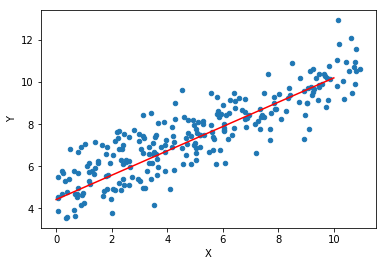

In [37]:
my_data.sample(250).plot(kind = "scatter", x = "X", y= "Y")
plt.plot(new_data, prediction, 'red')

# Classsification

In [38]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [39]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


we need to normalize the content now

In [40]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [41]:
col_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [42]:
diabetes[col_to_norm] = diabetes[col_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [43]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [44]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')
# continous values

In [45]:
# non-continous values
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])
#we know the possible list of groups
#this one is ude if we have lesser number of groups

In [46]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)
# bucket size should the maximum expected.
# we can use either of them but for now we are using vocabulary list

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c6fbd2978>]],
      dtype=object)

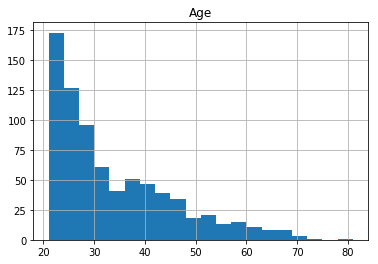

In [47]:
diabetes.hist(column='Age',bins= 20)
#here age is a continous value

In [48]:
#let's create a category of them
age_bucket = tf.feature_column.bucketized_column(source_column=age,boundaries=[20,30,40,50,60,70,80])
#source column should be a feature column

In [49]:
feat_colums = [num_preg,plasma_gluc, dias_press, tricep,insulin, bmi, diabetes_pedigree, assigned_group,age_bucket]

In [50]:
x_data = diabetes.drop(labels = 'Class', axis =1)

In [51]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [52]:
y_label = diabetes['Class']

In [53]:
y_label.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test  = train_test_split(x_data, y_label, test_size =0.3, random_state = 101)

 we made all the feature colums using tf.feature_column depending on whether they are numeric, categorial etc.
 we splitted the data. we need to use the estimator api futher

In [56]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=100, shuffle=True)
#beacuse we have data in pandas df

In [57]:
model = tf.estimator.LinearClassifier(feature_columns=feat_colums,n_classes=2)
#n_classes = 2 id for binary

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_is_chief': True, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9c52fa5860>, '_save_checkpoints_secs': 600, '_device_fn': None, '_tf_random_seed': None, '_train_distribute': None, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_model_dir': '/tmp/tmp1628zku9', '_master': '', '_task_id': 0, '_evaluation_master': '', '_num_ps_replicas': 0, '_session_config': None, '_service': None, '_keep_checkpoint_every_n_hours': 10000}


In [58]:
model.train(input_fn=input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp1628zku9/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 169.792
INFO:tensorflow:loss = 6.4213743, step = 101 (0.592 sec)
INFO:tensorflow:global_step/sec: 281.103
INFO:tensorflow:loss = 4.9496484, step = 201 (0.359 sec)
INFO:tensorflow:global_step/sec: 245.71
INFO:tensorflow:loss = 4.195146, step = 301 (0.406 sec)
INFO:tensorflow:global_step/sec: 265.218
INFO:tensorflow:loss = 6.637951, step = 401 (0.373 sec)
INFO:tensorflow:global_step/sec: 254.595
INFO:tensorflow:loss = 5.7424126, step = 501 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.914
INFO:tensorflow:loss = 4.467587, step = 601 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.106
INFO:tensorflow:loss 

In [59]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, 
                                                      batch_size=10, num_epochs=1000, 
                                                      shuffle=False)

In [60]:
results  = model.evaluate(input_fn=test_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-14-19:33:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1628zku9/model.ckpt-5370
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-14-19:35:22
INFO:tensorflow:Saving dict for global step 5370: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.8300823, auc_precision_recall = 0.6905859, average_loss = 0.49109405, global_step = 5370, label/mean = 0.35064936, loss = 4.9109406, precision = 0.64788735, prediction/mean = 0.3646069, recall = 0.56790125
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5370: /tmp/tmp1628zku9/model.ckpt-5370


In [61]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8300823,
 'auc_precision_recall': 0.6905859,
 'average_loss': 0.49109405,
 'global_step': 5370,
 'label/mean': 0.35064936,
 'loss': 4.9109406,
 'precision': 0.64788735,
 'prediction/mean': 0.3646069,
 'recall': 0.56790125}

 now we will give new data to the model which the model has never seen. but for now i'm passing the test data itself

In [62]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1000, shuffle=False)
#we need not senf the y_label because we are not trainig it

In [63]:
output = model.predict(input_fn=pred_input_func)

In [64]:
output

<generator object Estimator.predict at 0x7f9c52e5a3b8>

In [65]:
output = list(output)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1628zku9/model.ckpt-5370
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [67]:
output

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5144631], dtype=float32),
  'logits': array([0.0578686], dtype=float32),
  'probabilities': array([0.48553687, 0.5144631 ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.734863], dtype=float32),
  'logits': array([1.0194373], dtype=float32),
  'probabilities': array([0.26513702, 0.734863  ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.28542805], dtype=float32),
  'logits': array([-0.9176938], dtype=float32),
  'probabilities': array([0.714572  , 0.28542805], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.36062837], dtype=float32),
  'logits': array([-0.5726379], dtype=float32),
  'probabilities': array([0.63937163, 0.36062837], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=objec

# Now with DNN classifier

In [68]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_colums,n_classes=2)
# 3 layers with 10 nueron each

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_is_chief': True, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9c509b12b0>, '_save_checkpoints_secs': 600, '_device_fn': None, '_tf_random_seed': None, '_train_distribute': None, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_model_dir': '/tmp/tmp4b2wf3dy', '_master': '', '_task_id': 0, '_evaluation_master': '', '_num_ps_replicas': 0, '_session_config': None, '_service': None, '_keep_checkpoint_every_n_hours': 10000}


In [69]:
# dnn_model.train(input_fn=input_func, steps = 1000) will give an error. due to categorial columns. 
# we need to embedd them to avoid problem

In [70]:
embedde_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)
# dimension = 4; A,B,C,D

In [71]:
feat_cols_dnn = [num_preg,plasma_gluc, dias_press, tricep,insulin, bmi, diabetes_pedigree, embedde_group_col, age_bucket]

In [77]:
input_func_dnn= tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=100, shuffle=True)

In [78]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols_dnn,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_is_chief': True, '_task_type': 'worker', '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9c0abb3198>, '_save_checkpoints_secs': 600, '_device_fn': None, '_tf_random_seed': None, '_train_distribute': None, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_model_dir': '/tmp/tmpab2x1uup', '_master': '', '_task_id': 0, '_evaluation_master': '', '_num_ps_replicas': 0, '_session_config': None, '_service': None, '_keep_checkpoint_every_n_hours': 10000}


In [79]:
train_dnn = dnn_model.train(input_fn=input_func_dnn, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpab2x1uup/model.ckpt.
INFO:tensorflow:loss = 6.943304, step = 1
INFO:tensorflow:global_step/sec: 190.58
INFO:tensorflow:loss = 4.853292, step = 101 (0.529 sec)
INFO:tensorflow:global_step/sec: 275.743
INFO:tensorflow:loss = 3.7583783, step = 201 (0.364 sec)
INFO:tensorflow:global_step/sec: 284.449
INFO:tensorflow:loss = 4.889842, step = 301 (0.354 sec)
INFO:tensorflow:global_step/sec: 280.339
INFO:tensorflow:loss = 5.349573, step = 401 (0.354 sec)
INFO:tensorflow:global_step/sec: 235.138
INFO:tensorflow:loss = 7.021591, step = 501 (0.433 sec)
INFO:tensorflow:global_step/sec: 217.904
INFO:tensorflow:loss = 3.468042, step = 601 (0.449 sec)
INFO:tensorflow:global_step/sec: 246.418
INFO:tensorflow:loss = 

In [80]:
test_input_func_dnn = tf.estimator.inputs.pandas_input_fn(x =X_test,y=y_test,batch_size=100,num_epochs=1000,shuffle=False)

In [81]:
dnn_model.evaluate(input_fn=test_input_func_dnn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-14-20:09:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpab2x1uup/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-14-20:09:58
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7922078, accuracy_baseline = 0.64935064, auc = 0.8409877, auc_precision_recall = 0.71274096, average_loss = 0.47006568, global_step = 1000, label/mean = 0.35064936, loss = 47.00657, precision = 0.6987952, prediction/mean = 0.36902767, recall = 0.7160494
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpab2x1uup/model.ckpt-1000


{'accuracy': 0.7922078,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8409877,
 'auc_precision_recall': 0.71274096,
 'average_loss': 0.47006568,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 47.00657,
 'precision': 0.6987952,
 'prediction/mean': 0.36902767,
 'recall': 0.7160494}